# Bike Sharing Demand Prediction


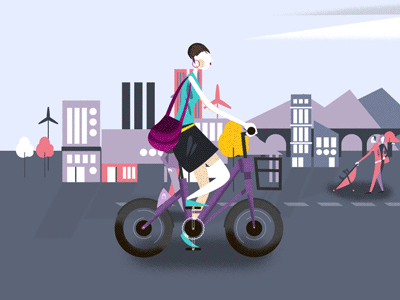

## **Problem Statement**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

### **Importing Required Libraries**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from tabulate import tabulate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn import metrics
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#for visualizing decision trees
import graphviz
from sklearn.tree import export_graphviz
sns.set_style('darkgrid')

#suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
data = 'Bike_Sharing_demand_prediction.csv'
bike_df = pd.read_csv(data, encoding= 'ISO-8859-1')

In [3]:
# First 10 observation
bike_df.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [4]:
# Last 10 observations
bike_df.tail(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8750  30/11/2018                761    14              7.8           20   
8751  30/11/2018                768    15              7.0           20   
8752  30/11/2018                837    16              7.2           23   
8753  30/11/2018               1047    17              6.0           29   
8754  30/11/2018               1384    18              4.7           34   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8750               2.2              2000                      -13.8   
8751               3.3              1994                      -14.4   
8752               1.5              1945                      -12.6   
8753               2.1              1877                      -10.7   
8754               1.9              1661                       -9.8   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8750                     1.67           0.0            0.0  Autumn   
8751                     1.21           0.0            0.0  Autumn   
8752                     0.72           0.0            0.0  Autumn   
8753                     0.23           0.0            0.0  Autumn   
8754                     0.00           0.0            0.0  Autumn   
8755                     0.00           0.0            0.0  Autumn   
8756                     0.00           0.0            0.0  Autumn   
8757                     0.00           0.0            0.0  Autumn   
8758                     0.00           0.0            0.0  Autumn   
8759                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  
8750  No Holiday             Yes  
8751  No Holiday             Yes  
8752  No Holiday             Yes  
8753  No Holiday             Yes  
8754  No Holiday             Yes  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

## **Data Description**
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
## **Attribute Information:**
1. Date : year-month-day
2. **Rented Bike count - Count of bikes rented at each hour(dependent value)**
3. Hour - Hour of the day
4. Temperature-Temperature in Celsius
5. Humidity - %
6. Windspeed - m/s
7. Visibility - 10m
8. Dew point temperature - Celsius
9. Solar radiation - MJ/m2
10. Rainfall - mm
11. Snowfall - cm
12. Seasons - Winter, Spring, Summer, Autumn
13. Holiday - Holiday/No holiday
14. Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## **Data Inspection**

In [5]:
# Checking shape of the dataset
bike_df.shape

(8760, 14)

In [6]:
# Checking columns name of dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# Basic information of dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Description of Dataset
bike_df.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

## **Data Cleaning**


### **Handling Duplicate Values**


In [9]:
# Checking for number of duplicated values
count_duplicated = bike_df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


### **Handling Null/ Missing Values**

In [10]:
# Checking for number of null values
count_null=pd.DataFrame(bike_df.isna().sum()).rename(columns={0:'number_of_nulls_values'})
count_null

number_of_nulls_values
Date                                            0
Rented Bike Count                               0
Hour                                            0
Temperature(°C)                                 0
Humidity(%)                                     0
Wind speed (m/s)                                0
Visibility (10m)                                0
Dew point temperature(°C)                       0
Solar Radiation (MJ/m2)                         0
Rainfall(mm)                                    0
Snowfall (cm)                                   0
Seasons                                         0
Holiday                                         0
Functioning Day                                 0

Dataset having 0 null values.

### **Handling Outliers**

### **Categorical variables**

In [11]:
# Find categorical variables
bike_df['Date'] = bike_df['Date'].astype('datetime64[ns]') # Changing the data type of 'Date' columns

categorical_variables = [var for var in bike_df.columns if bike_df[var].dtype=='O']  # extracts the names of columns in bike_df that contain categorical variables
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*50)
print(categorical_variables)

There are 3 categorical variables
----------------------------------------------------------------------------------------------------
['Seasons', 'Holiday', 'Functioning Day']


In [12]:
# Checking number of categories in each categorical variables
categorical_variables_df = bike_df[categorical_variables]
for i in categorical_variables_df.columns:
    print(categorical_variables_df[i].value_counts())
    print('--'*50)

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


There are three categorical variables: "Seasons," "Holidays," and "Functioning Day."

### **Numerical variables**

In [13]:
# Finding numerical variables
numerical_variables=[var for var in bike_df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*50)
print(numerical_variables)

There are 11 numerical variables
----------------------------------------------------------------------------------------------------
['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [14]:
# Checking number of categories
numerical_variables_df= bike_df[numerical_variables]
for i in numerical_variables_df.columns:
    print(numerical_variables_df[i].value_counts())
    print('--'*50)

Date
2017-01-12    24
2018-09-08    24
2018-07-08    24
2018-06-08    24
2018-05-08    24
              ..
2018-03-31    24
2018-03-30    24
2018-03-29    24
2018-03-28    24
2018-11-30    24
Name: count, Length: 365, dtype: int64
----------------------------------------------------------------------------------------------------
Rented Bike Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: count, Length: 2166, dtype: int64
----------------------------------------------------------------------------------------------------
Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Tempe

Date, Rented Bike Count, Hour, Temperature (°C),Humidity (%), Wind speed (m/s), Visibility (10 m), Dew point temperature (°C), Solar Radiation (MJ/m2),Rainfall (mm) and Snowfall (cm) are total 11 numerical variables.

____________________________________________________________________________________________________


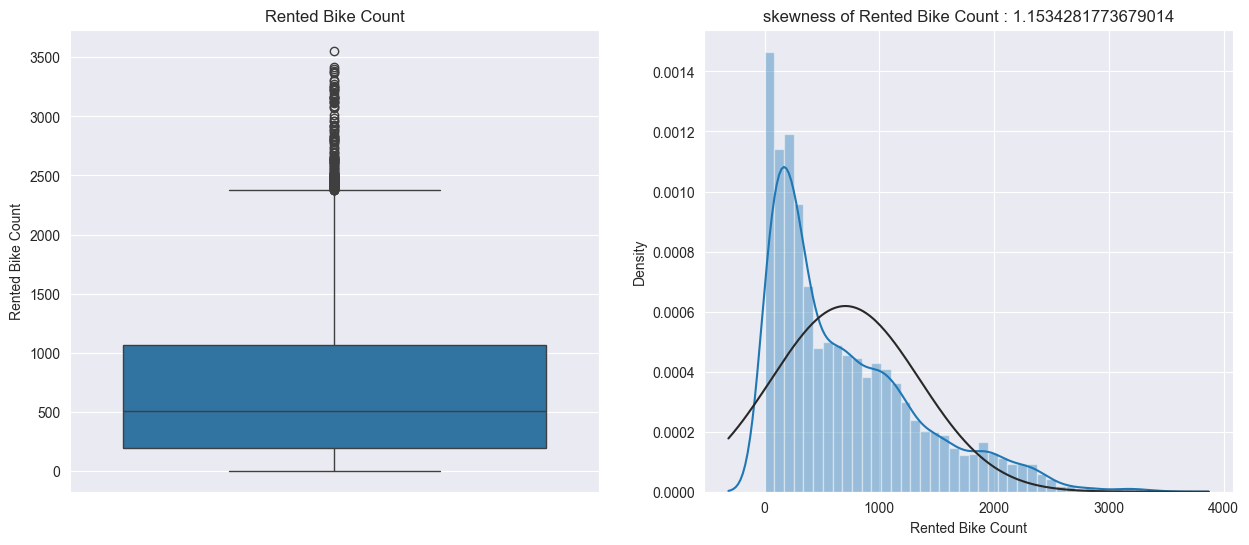

____________________________________________________________________________________________________


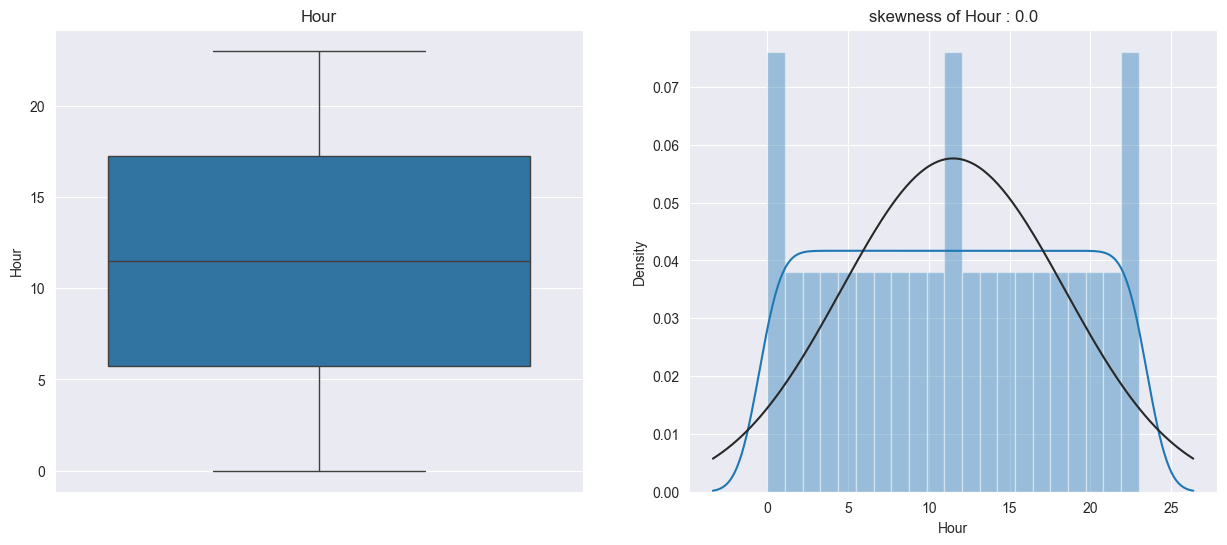

____________________________________________________________________________________________________


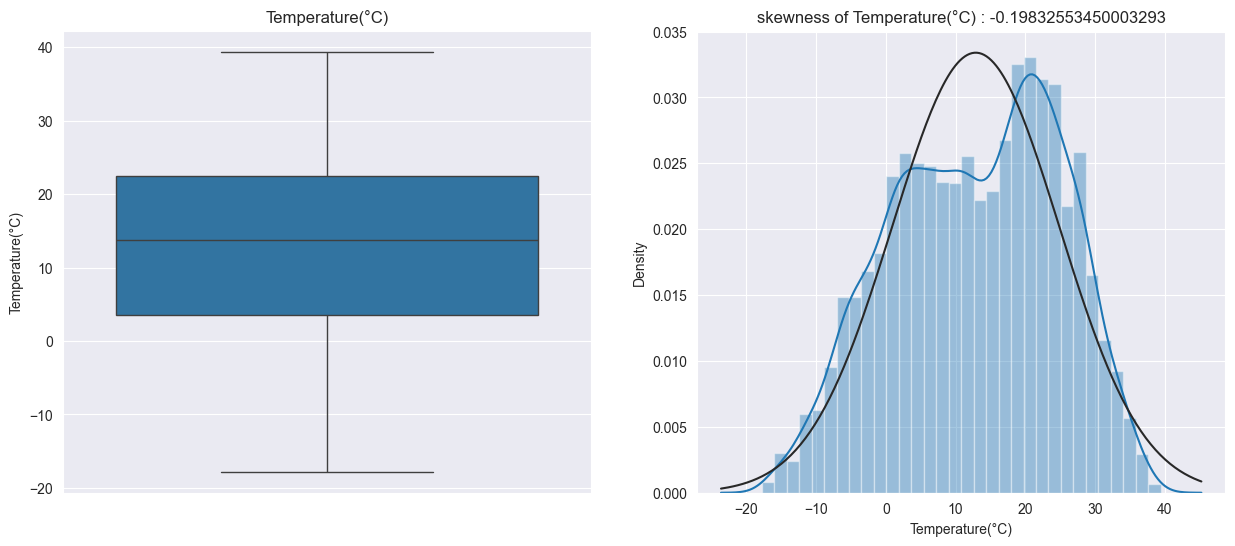

____________________________________________________________________________________________________


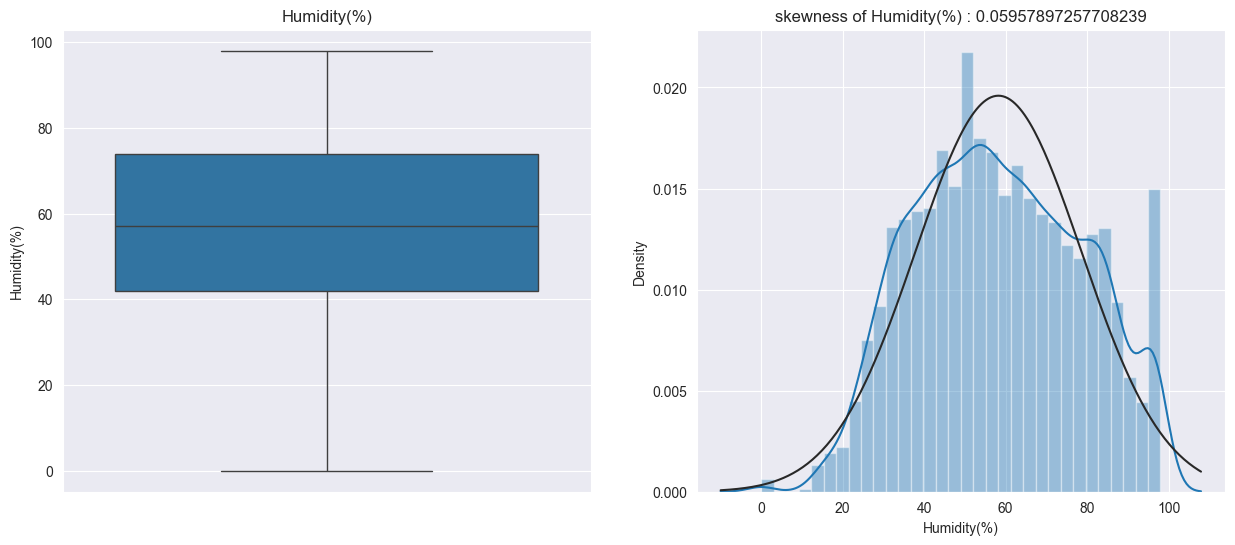

____________________________________________________________________________________________________


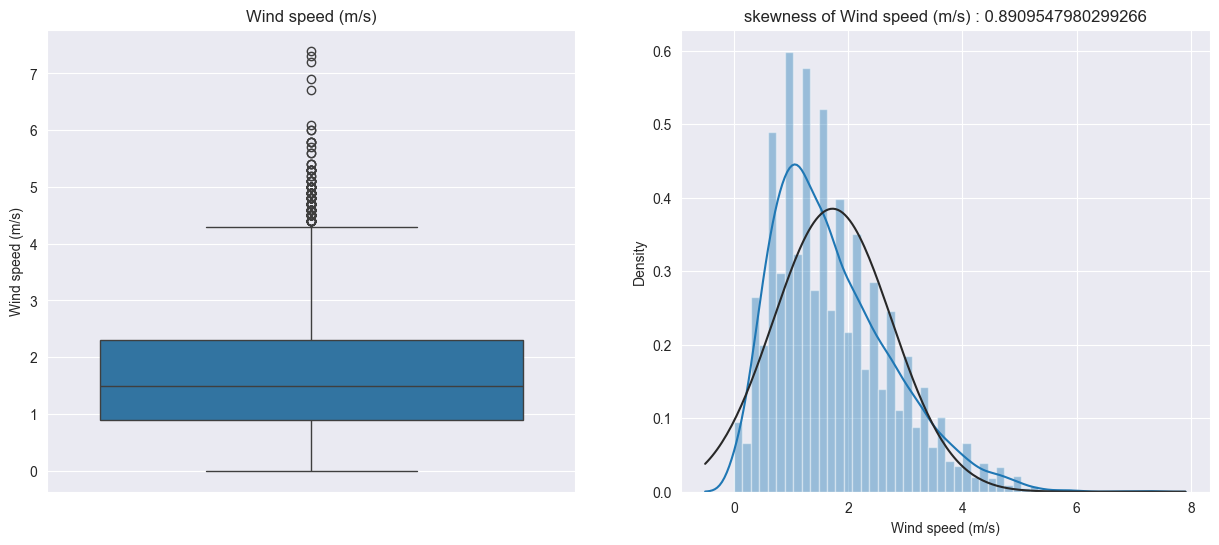

____________________________________________________________________________________________________


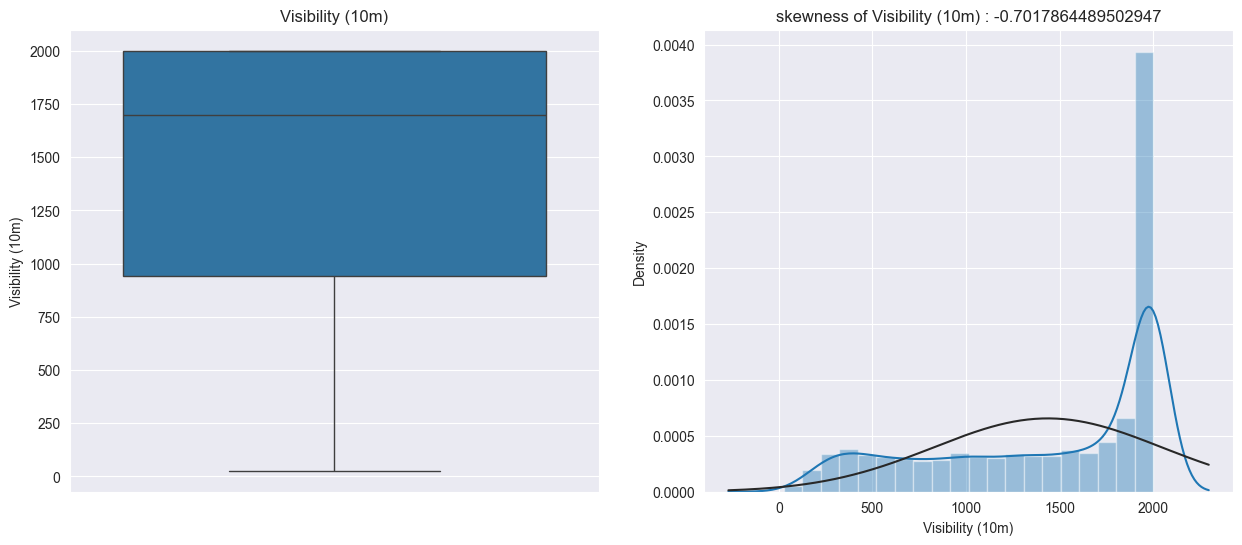

____________________________________________________________________________________________________


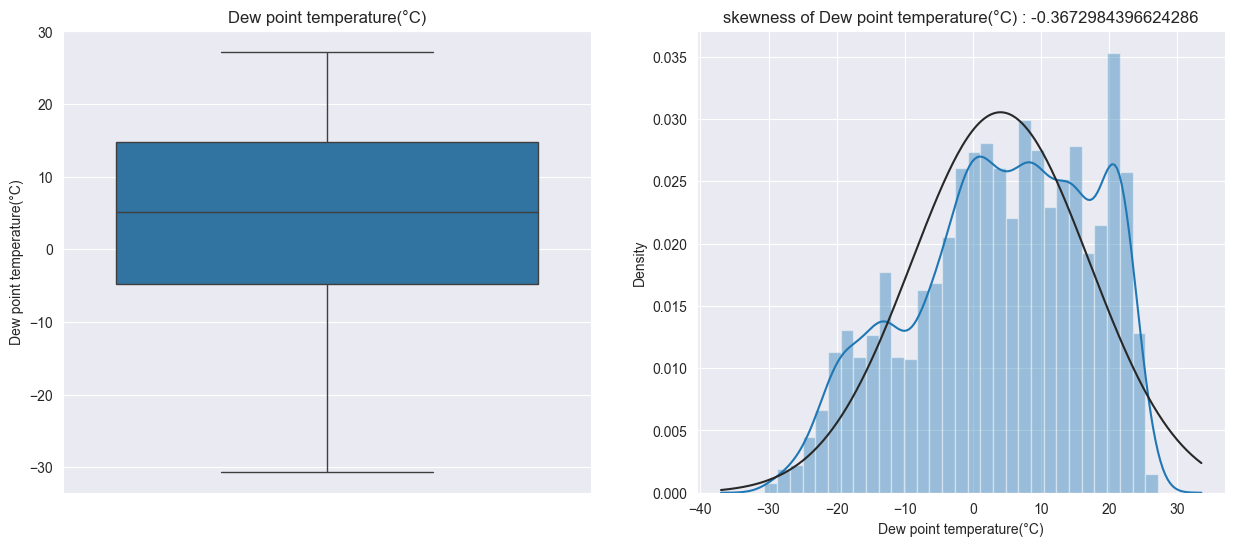

____________________________________________________________________________________________________


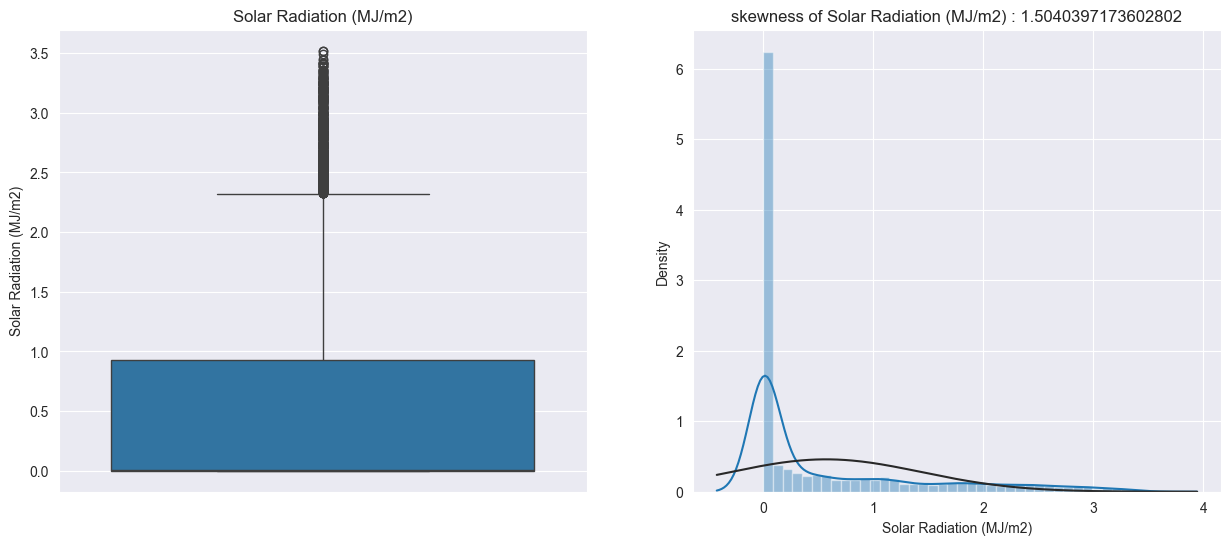

____________________________________________________________________________________________________


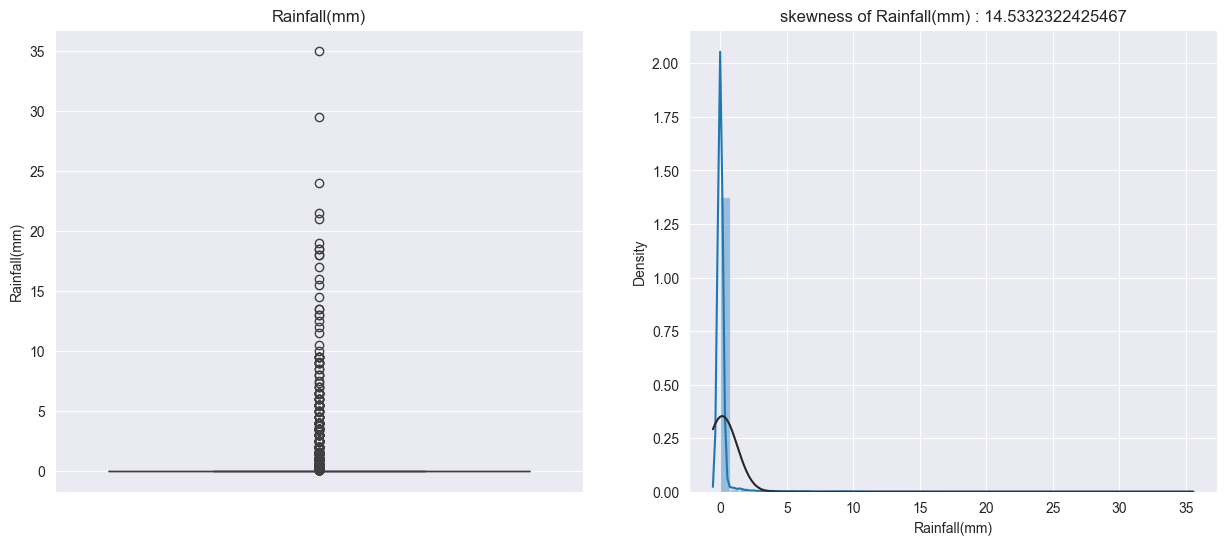

____________________________________________________________________________________________________


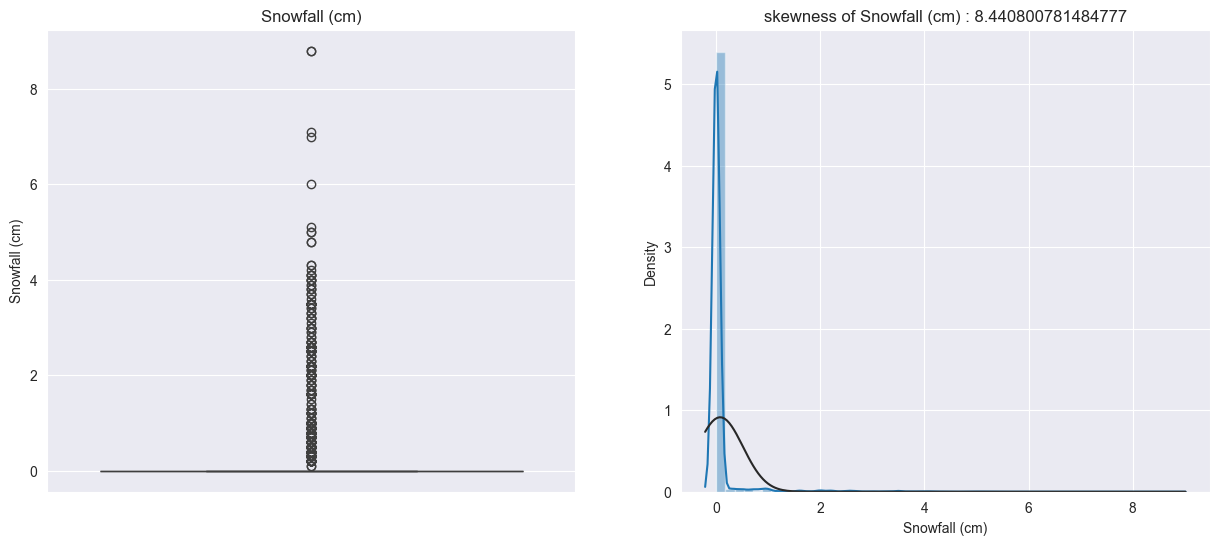

In [15]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in numerical_variables_df.columns if var not in ["Date"]]

# Plotting Box and Distribution plot
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=bike_df[var]) # This creates a boxplot using the data from the bike_df DataFrame for the current variable var.
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(bike_df[var], fit=norm)
    # This creates a distribution plot using the data from the bike_df DataFrame for the current variable var.
    #The fit=norm parameter fits a normal distribution to the data.
    ax.set_title(f'skewness of {var} : {bike_df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

The variables Rented Bike Count, Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall (mm) and Snowfall (cm) have outliers. Rainfall (mm) and Snowfall (cm) have a flat interquartile range; it is best to remove those columns.

In [18]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features
outlier_var=['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1= bike_df[i].quantile(0.25)
    Q3= bike_df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit = bike_df[i].quantile(0.25)-1.5*IQR
    upper_limit = bike_df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    bike_df.loc[(bike_df[i] > upper_limit),i] = upper_limit # it replaces values above the upper limit with the upper limit itself.
    bike_df.loc[(bike_df[i] < lower_limit),i] = lower_limit #It replaces values below the lower limit with the lower limit itself.

____________________________________________________________________________________________________


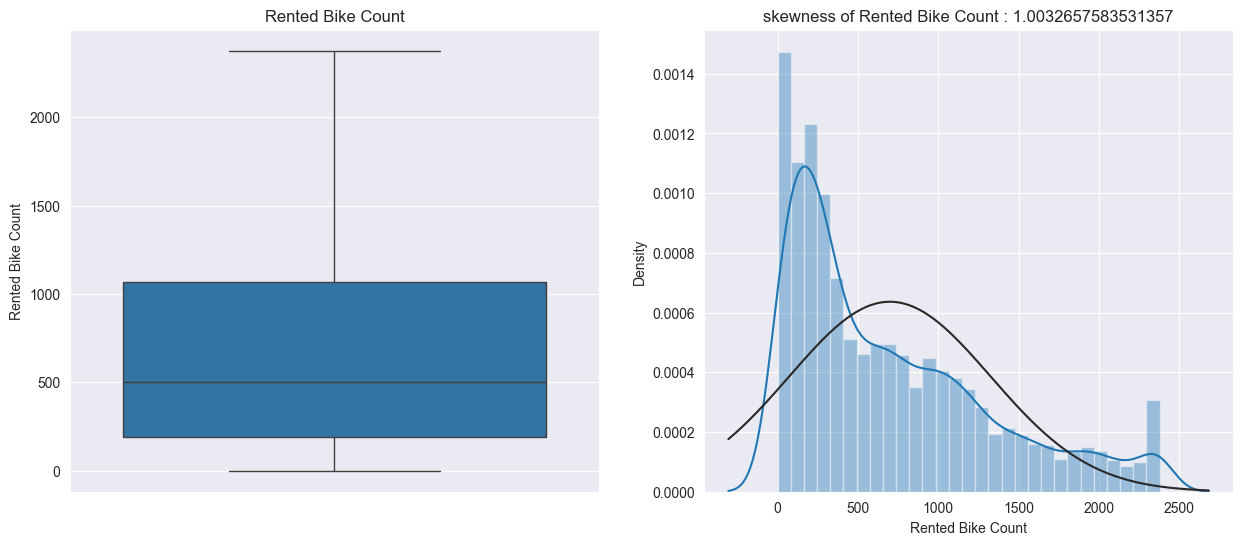

____________________________________________________________________________________________________


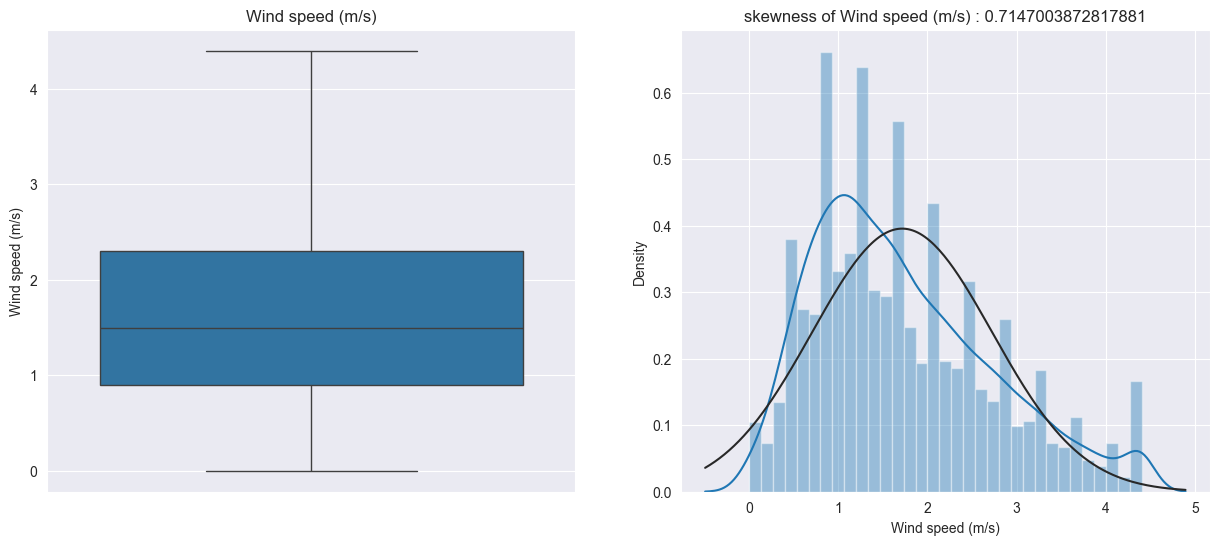

____________________________________________________________________________________________________


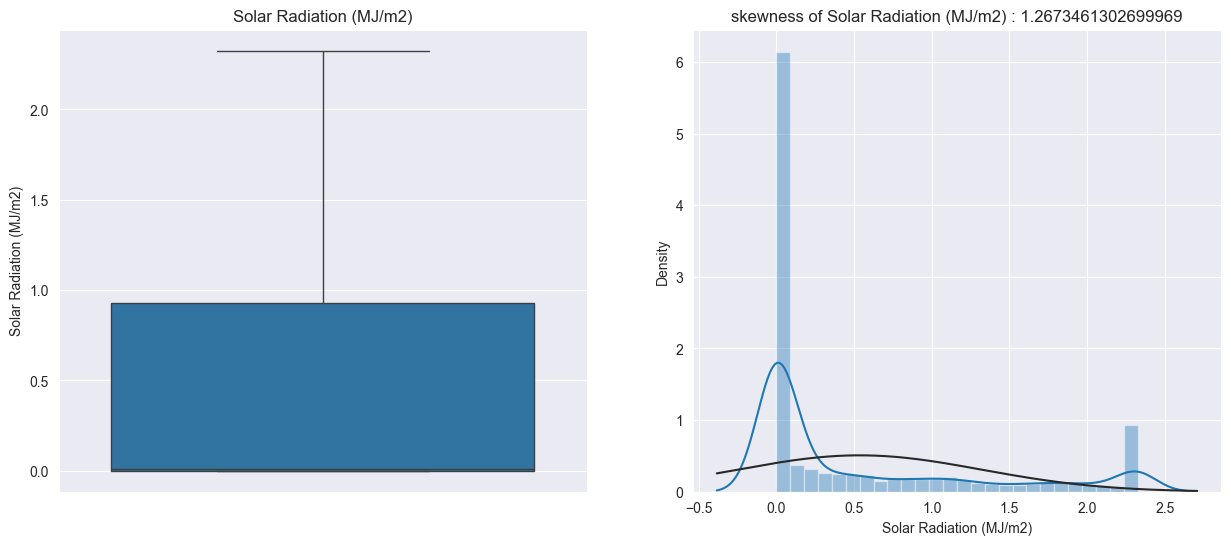

In [19]:
# Checking outliers for after removing it

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=bike_df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(bike_df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {bike_df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

## **Conclusion**

The following observations were made after importing and analyzing the data :
1. Customers favour rental motorcycles equally in all seasons.
2. When there are no holidays, customers choose to rent motorcycles. Customers hardly ever use the bikes they rent while traveling on holiday.
3. Nearly all consumers preferred to rent bikes during functional hours.
4. Bicycle rentals are popular all month long.
5. Renting bicycles was not very popular in 2017, but it increased by 83.02 percent in 2018.
6. At night, customers do not prefer to use rented bikes.
7. Customers do not prefer rented bikes in the mornings 4 and 5, but from 7, 8, and 9, the use of rented bikes increases, possibly due to working people going to the office, and it is the same in the evenings 5, 6, and 7, because people are travelling from the office to home. Overall, the rented bike was the most frequently used during office in and out times.
8. Customers mostly use rented bikes for transportation in the evening.
9. Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.
10. When the humidity level is between 10% and 18%, people prefer to rent bikes.
11. wind speed is between 2 m/s and 3.5 m/s, people consistently use rented bikes, and it is at its peak when wind speed is normal, which is 3.2 m/s.